# Exercise
Load the dataset ``data/bike_day_raw.csv``, which has the regression target ``cnt``.
This dataset is hourly bike rentals in the citybike platform. The ``cnt`` column is the number of rentals, which we want to predict from date and weather data.

Split the data into a training and a test set using ``train_test_split``.
Use the ``LinearRegression`` class to learn a regression model on this data. You can evaluate with the ``score`` method, which provides the $R^2$ or using the ``mean_squared_error`` function from ``sklearn.metrics`` (or write it yourself in numpy).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Himanshu Agarwal\Desktop\Python programs\ML using Python Microsoft\day4\day4\data\bike_day_raw.csv")
print(df.head())

   season  mnth  holiday  weekday  workingday  weathersit      temp     atemp  \
0       1     1        0        6           0           2  0.344167  0.363625   
1       1     1        0        0           0           2  0.363478  0.353739   
2       1     1        0        1           1           1  0.196364  0.189405   
3       1     1        0        2           1           1  0.200000  0.212122   
4       1     1        0        3           1           1  0.226957  0.229270   

        hum  windspeed   cnt  
0  0.805833   0.160446   985  
1  0.696087   0.248539   801  
2  0.437273   0.248309  1349  
3  0.590435   0.160296  1562  
4  0.436957   0.186900  1600  


In [3]:
df_copy = df.copy()

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


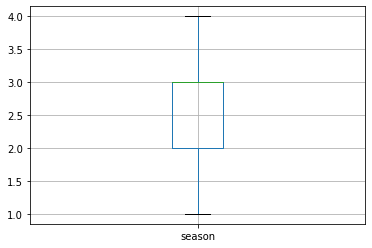

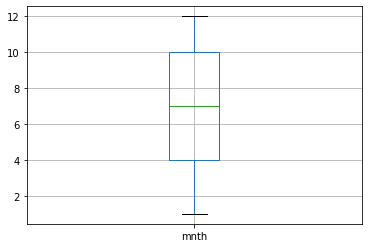

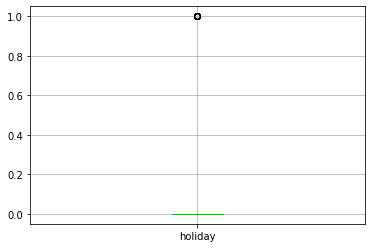

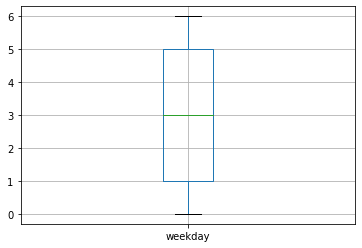

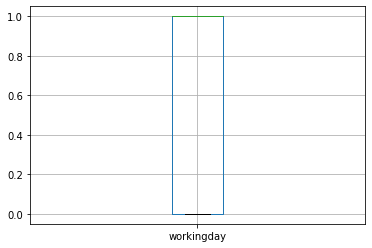

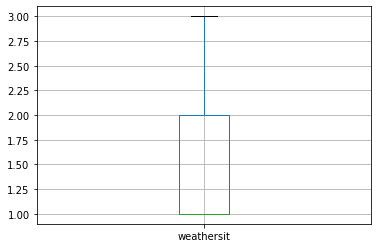

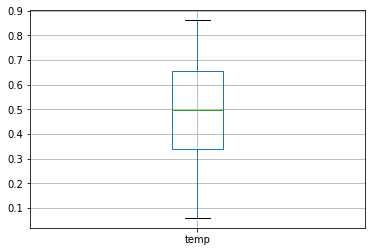

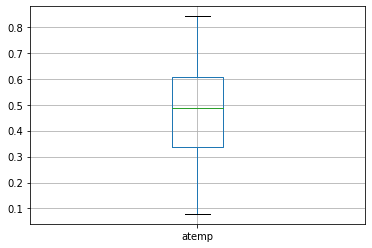

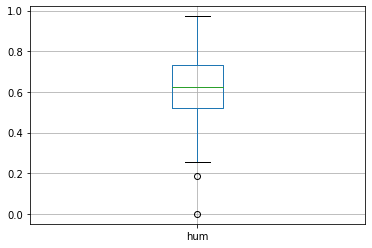

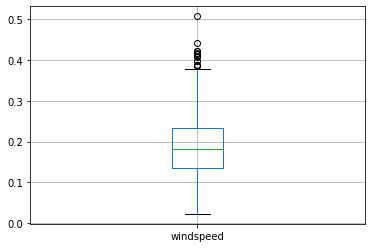

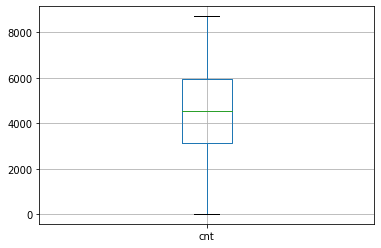

In [5]:
#Data has been cleaned up already as we can see.
for i in df_copy.columns:
    df[[i]].boxplot()
    plt.show()

In [6]:
#Data seems to be clear already

In [7]:
#Data need not be scaled .

In [8]:
df_copy.corr()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.234545


In [9]:
#As we can see, temp and atemp are highly correlated. So dropping one of them.
#Also dropping one of weekday and working day since their correlation with cnt is almost equal.
#Also dropping one of weathersit and windspeed since their corrlelation with cnt is almost equal as well.
df_copy.drop(['atemp','weekday','weathersit'],axis=1,inplace=True)

In [10]:
#Let's create LinearRegression model
from sklearn.model_selection import train_test_split

In [11]:
df_copy.columns

Index(['season', 'mnth', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [48]:
x = df_copy[['season', 'workingday', 'temp', 'hum']]
y = df['cnt']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)


In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.4747779388317612

In [51]:
print("Coefficients:\t",lr.coef_)
print("\nIntercept\t",lr.intercept_)

Coefficients:	 [  433.27280234   216.78770111  6021.3394877  -2916.2701174 ]

Intercept	 2098.536653529698


In [52]:
y_pred = lr.predict(x_test)

In [53]:
x_test["Predicted value"] = y_pred
x_test["Actual value"] = y_test

C:\Users\Himanshu Agarwal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Himanshu Agarwal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
x_test

,season,workingday,temp,hum,Predicted value,Actual value
228,3,1,0.723333,0.575417,6292.504915,4694
679,4,0,0.389167,0.645417,4292.724177,6536
56,1,0,0.282500,0.537917,2664.126588,1969
207,3,1,0.775000,0.402917,7106.666058,4656
719,4,1,0.330000,0.667917,4087.631207,4128
...,...,...,...,...,...,...
441,1,0,0.514167,0.755833,3423.570325,7836
499,2,1,0.573333,0.789583,4331.465284,2843
9,1,1,0.150833,0.482917,2248.497440,1321
61,1,1,0.198333,0.318333,3014.482466,1685


In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:\t\t",mse)
print("Root Mean Squared Error:\t",np.sqrt(mse))

Mean Squared Error:		 2158016.3398753917
Root Mean Squared Error:	 1469.0188357796478


In [56]:
#The reason for my score to be very poor(It is linear regression, so my score should have been as low as possible.) is 
#scarse(irregular) data.

In [60]:
#To improve our model, we can try to use statsmodels.api module 
#We'd generate a model summary which provides us with details about the model.
#Look into the summary and drop all columns one by one with P>|t| above 0.05
#Check for score each time, score should improve by doing so

In [61]:
import statsmodels.api as sm

In [62]:
fit = sm.OLS(y,x).fit()

In [63]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              1894.
Date:                Sat, 01 Aug 2020   Prob (F-statistic):                        0.00
Time:                        01:26:09   Log-Likelihood:                         -6358.8
No. Observations:                 731   AIC:                                  1.273e+04
Df Residuals:                     727   BIC:                                  1.274e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       516.8916     51.714      9.995      0.000     415.365     618.418
workingday   362.9670    112.465      3.227      0.001     142.172     583.762
temp        6836.1825    294.815     23.188      0.000    6257.392    7414.973
hum         -800.9201    258.469     -3.099      0.002   -1308.354    -293.486
==============================================================================
Omnibus:                        2.746   Durbin-Watson:                   0.479
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.515
Skew:                          -0.073   Prob(JB):                        0.284
Kurtosis:                       2.753   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#As we can see, score has improved from 0.54 to 0.47 after analysis using statsmodels.api
#Still it is not upto the mark. This could only be improved by Greedy backward/forward selection which we have to do 
#manually only.
#If the score remains unaffected by Greedy backward/forward selection as well ,then surely there has to some discrepancy in
#our data only.